# Support Vector Machines
- maximum margin for closest point to the line. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [29]:
df = pd.read_csv('Datasets/SVM_Dataset1.csv', index_col=0)
df

,X1,X2,y
0,2.947814,6.626878,1
1,2.530388,7.785050,1
2,3.566991,5.651046,1
3,3.156983,5.467077,1
4,2.582346,4.457777,-1
5,2.155826,6.222343,-1
6,3.273418,3.520687,-1


## 0. map the values for 1 = h -1 nh 
## 1. assign colors 
## 2. make scatter plot for colors and labels 

In [40]:
new = df.copy()
x_train = new.drop('y', axis=1)
x_train = x_train.values
y_train = new['y'].values
y_train

array([ 1,  1,  1,  1, -1, -1, -1])

In [41]:
x_train

array([[2.947814, 6.626878],
       [2.530388, 7.78505 ],
       [3.566991, 5.651046],
       [3.156983, 5.467077],
       [2.582346, 4.457777],
       [2.155826, 6.222343],
       [3.273418, 3.520687]])

In [42]:
#df['y'] = data['y'].map({'Sea view':1, 'No sea view':0})

In [43]:
label = []
for k in y_train:
    if k == 1:
        label.append('H') # healthy
    else:
        label.append('NH') # not healthy 
label

['H', 'H', 'H', 'H', 'NH', 'NH', 'NH']

In [44]:
color_ls = []
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
color_ls
        

['b', 'b', 'b', 'b', 'r', 'r', 'r']

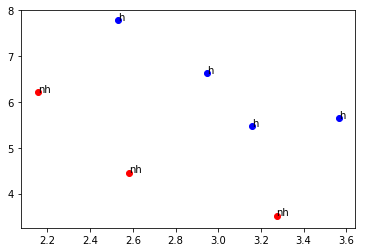

In [45]:
import matplotlib.pyplot as plt

for k, (i,j) in enumerate(x_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i, j, health[k])

In [24]:
from sklearn import svm

svm_classifier = svm.SVC(kernel='linear', C=10)

svm_classifier.fit(x_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

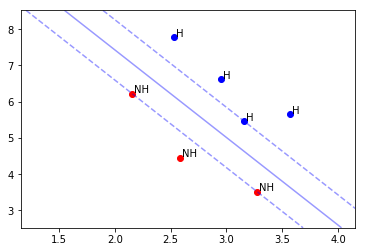

In [50]:
plot_decision_boundary(svm_classifier, x_train, y_train)

for k, (i,j) in enumerate(x_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

In [51]:
# what are the support vectors 
svm_classifier.support_vectors_

array([[2.155826, 6.222343],
       [3.273418, 3.520687],
       [3.156983, 5.467077]])

In [53]:
# obtain the slope (weight) and intercept of the best line equation 

# a and b 
weight=svm_classifier.coef_
#c
intercept = svm_classifier.intercept_
print(weight)
print(intercept)


[[2.90336685 1.20121959]]
[-14.73321143]


# Activity: Am I healthy: given my levels are (3,6)

In [69]:
# n = np.array([3,6])
# n.reshape((-1,1))
svm_classifier.predict([[3,6]])

array([1])

Good, I am not depressed :)

In [68]:
svm_classifier.predict([[2.5,5]])

array([-1])

## Activity: SVM training, obtain its support vectors, visualize the decision boundary and check SVM performance

Task: Follow the steps in

https://people.revoledu.com/kardi/tutorial/Python/SVM+in+Python.html

1- Create the dataset

2- Define the SVM model as the classifier 

3- Fit the SVM with training dataset

4- Obtain its support vectors 

5- Obtain the score of the trained SVM model

In [71]:
medical = pd.read_csv('Datasets/SVM_Dataset2.csv')
medical.head()

,x1,x2,y
0,7.0,20,-1
1,8.0,12,-1
2,9.0,19,-1
3,10.0,17,-1
4,11.0,15,-1


In [87]:
x_train = medical.drop(['y'],axis=1)
x_train = x_train.values
y_train = medical['y'].values

In [89]:
y_train

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

In [90]:
color_ls = []
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
color_ls

['r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b']

In [93]:
health = []
for k in y_train:
    if k == 1:
        health.append('H')
    else:
        health.append('NH')
health

['NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H']

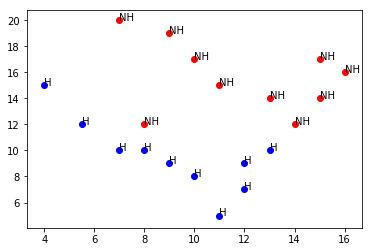

In [94]:
import matplotlib.pyplot as plt

for k, (i,j) in enumerate(x_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i, j, health[k])

## Activity for unbalanced dataset

1. create x and y 
2. instantiate two svm models: 1. without class weights 2. with class weight
3. fit two models with x and y 
4. obtain the error rate for blue and red classes for two models

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [117]:
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt


#svm_classifier = svm.SVC(kernel='linear',C=10)
svm_classifier = svm.SVC(kernel='linear', C=10)
#svm_classifier = svm.SVC(kernel='poly', C=10)
# svm_classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)

svm_classifier.fit(X, y)

    


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [118]:
color_ls = []
for k in y:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
color_ls

['r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r'

In [119]:

label = []
for k in y:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')
label


['NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',

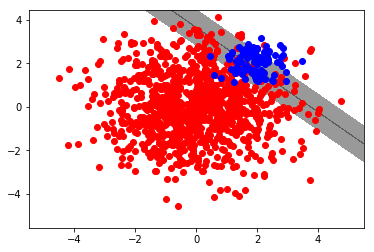

In [121]:
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, colors='k', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    

plot_decision_boundary(svm_classifier, X, y)

for k, (i,j) in enumerate(X):
    plt.scatter(i, j, c = color_ls[k])
    #plt.text(i+0.02, j+0.02, label[k])